# Clustering

- TIPACCID (Tipo de accidente):
     x- 0: Certificado 0
     - 1: Colisión con vehículo automotor
     - 2: Colisión con peatón (atropellamiento)
     - 3: Colisión con animal
     - 4: Colisión con objeto fijo
     - 5: Volcadura
     x- 6: Caída de pasajero
     - 7: Salida del camino
     x- 8: Incendio
     x- 9: Colisión con ferrocarril
     - 10: Colisión con motocicleta
     - 11: Colisión con ciclista
     x- 12: Otro


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

In [17]:
df = pd.read_csv('../data/processed/nacional.csv')

C:\Users\isaij\AppData\Local\Temp\ipykernel_17976\3513714135.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/nacional.csv')


In [18]:
lon = df['LONGITUD']
lat = df['LATITUD']
tipaccid = df['TIPACCID']

In [ ]:
X1, label1 = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=5, random_state=123)
plt.scatter(X1[:, 0], X1[:, 1], c=label1, alpha=0.7)
plt.show()

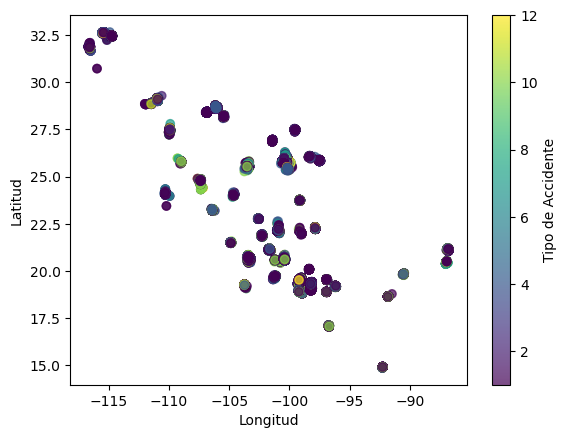

In [19]:
plt.scatter(lon, lat, c=tipaccid, alpha=0.7)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.colorbar(label="Tipo de Accidente")

plt.show()

In [36]:
X = df[['LONGITUD', 'LATITUD', 'TIPACCID']]

In [37]:
idx = np.random.choice(X.shape[0], size=500, replace=False)
X_sample = X.iloc[idx]

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_sample)

In [39]:
agglo = AgglomerativeClustering(n_clusters=32)
agglo.fit(X_sample)

AgglomerativeClustering(n_clusters=32)

In [40]:
labels = agglo.labels_

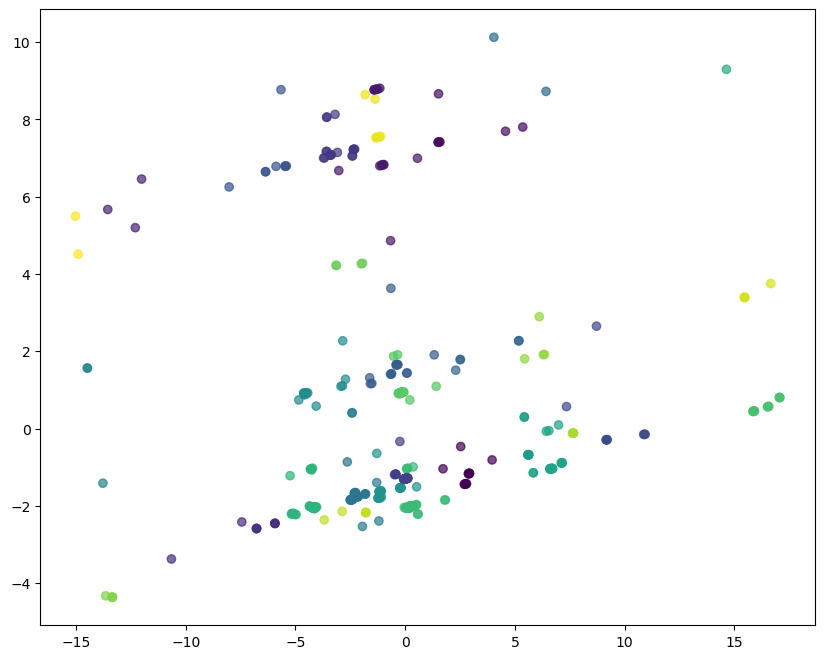

In [41]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, alpha=0.7)

In [33]:
agglo2 = AgglomerativeClustering(n_clusters=8)
agglo2.fit(X_sample)

AgglomerativeClustering(n_clusters=8)

In [34]:
labels = agglo2.labels_

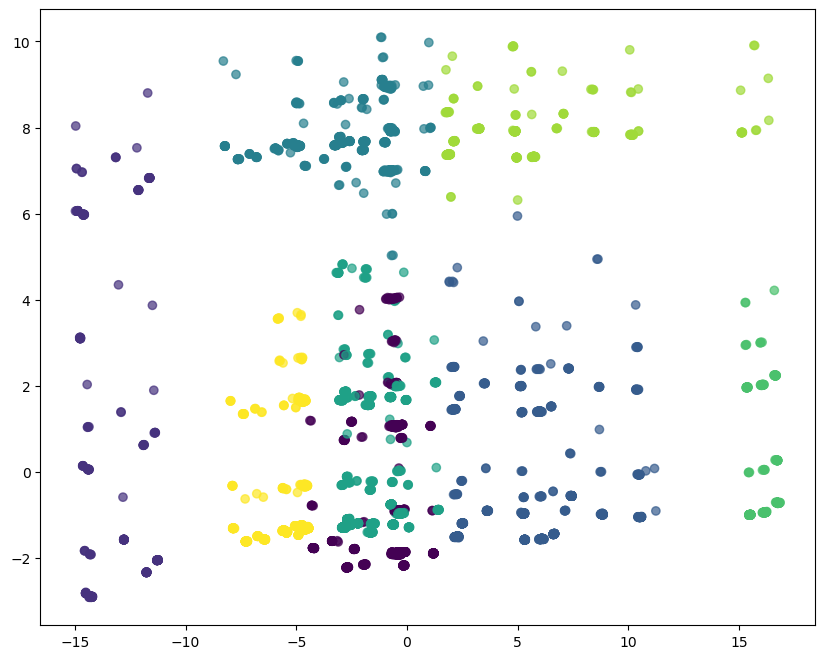

In [35]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, alpha=0.7)

In [ ]:
X = np.column_stack((lon, lat, tipaccid))

linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(12, 8))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    sch.dendrogram(sch.linkage(X, method=method))
    plt.title(f'Dendrograma - {method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

In [8]:
from scipy.cluster.hierarchy import  dendrogram, linkage
import scipy.cluster.hierarchy as sch